In [1]:
library(tidyverse)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("CESC", "UCS", "UCEC")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")

In [3]:
dset_idx <- 3

In [4]:
text_size <- 8
guide_size <- 1
family <- "ArialMT"
dpi <- 320
ht <- 3
wd <- 6

top_n <- 10

In [5]:
deg_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_go.tsv"))
deg_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_kegg.tsv")) %>%
    mutate(type = tolower(type))
demg_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_go.tsv"))
demg_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_kegg.tsv")) %>%
    mutate(type = tolower(type))
figo_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_go.tsv"))
figo_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_kegg.tsv")) %>%
    mutate(type = tolower(type))
survival_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_go.tsv"))

# No survival KEGG results for UCEC
if (dset_idx != 3) {
    survival_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_kegg.tsv")) %>%
        mutate(type = tolower(type))
}



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double(),
  ont = col_character()
)



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double()
)



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double(),
  ont = col_character()
)



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character

In [6]:
ea_plot <- function(df, title = "", top = 40, label_size = 16, qval_thresh = 0.05, type_filter = "") {
    df <- df %>%
        dplyr::filter(qval < qval_thresh) %>%
        {if (type_filter != "") dplyr::filter(., str_detect(type, type_filter)) else . } %>%
        dplyr::top_n(n = -top, wt = qval) %>%
        dplyr::arrange(-log10(qval)) %>%
        dplyr::mutate(type_fact = factor(type, levels = type))
    ggplot(df) +
        geom_bar(aes(x = type_fact, y = -log10(qval)), stat = "identity") +
        theme_classic() +
        theme(
            text = element_text(size = text_size, family = family),
            axis.title.y = element_blank(),
            axis.ticks.y = element_blank()
        ) +
        labs(y = bquote(paste(-log[10], italic(q), "-value"))) +
        coord_flip()
}


# DEG enrichment

In [7]:
deg_go_df

type,geneIDs,count,ratio,qval,ont
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
regulation of cytosolic calcium ion concentration,HRH4/CACNA2D1/GPER1/TMEM64/NMUR2/PDGFRA/CCR1/TPCN1/SMAD3/JPH2/ACKR4/PDPK1/CD4/CXCL13/LPAR6/TAC1/PLN/CAPN3/CD19/BDKRB1/JSRP1/KCNK3/P2RY6/LCK/ACKR2/PTGER1/CXCL10/GRIN2B/CDH23/HCRTR1/FPR3/GALR2/CCR4/GPR55/GRM1/ABL1/ADCY5/TRPV5/MCOLN2/TRDN/CXCL9/GSTM2/NMU/CEMIP/GPR18/GIPR/PTGER3/ATP2B4/CCKBR/AVPR1B/RYR2/FASLG/CCL28/CCR8/FAM155B/PTGER2/PTGFR/PLA2G1B/CXCR3/HTR2A/LPAR4/CAV1/SLC8A1/GRIN1/CALCR/CAV3/UBASH3B/FZD9/NTSR1/CDK5/CLIC2/ATP1A2/GOT1/S1PR1/TRPC1/JAK2/PTPN6/KNG1/FGF2/CD55/CXCR4/LPAR3/SAA1/PKD2/P2RX2/TSPOAP1/YWHAE/ITPR1/CNGB1/F2RL1/HTR1B/SCGN/IL2/TACR1/CCL3/ADRA1D/F2/GNAT2/P2RX4/CXCR2/GPR17/RIC3/CCR3/ADRA1A/TAC4/P2RY10/P2RY1/GATA2/RYR1/FAM155A/ERO1A/CCR6/RYR3/CHD7/RASA3/SNCA/LPAR1/PTGDR/S1PR3/CCR10/ANK2/FYN/NPTN/CALB1/CALB2/PLCE1/NCS1/TMEM178A/LRP1/GRM5/AGTR1/C1QTNF1/PRNP/SYNPO/P2RY4/BAX/TRPM4/TRPC4/AVPR1A/DMD/SLC8A2/GLP1R/NOS1/METTL21C/CAV2/EDNRA/P2RX7/LYN/CALCA/PROK2/TGM2/PKD1/CACNA1C/AKAP6/GRIA1/IL13/CD36/XCL1/PTH1R/EPO/GRIN2A/CASQ2/CHRNA9/CACNB2/GNA15/TRPM2/HAP1/ADCYAP1/CD38/ITPR3/CACNA1D/GPR4/CCR5/TBXA2R/TRPM1/GRIN2D/TRPV4/BCL2/FFAR4/ATP2B3/CXCL11/P2RX1/RAMP3/OPRL1/MCHR1/PDE4D/JPH3/JPH4/OXT/CMKLR1/DRD2/CXCR6/PTGIR/ADORA1/KISS1/HTR2B/DLG4/HRC/GPR35/CYBA/CD52/MYO5A/EDN2/CALCB/DHRS7C/DRD1/CNR1/MCOLN3/TRPV6/LPAR2/KCNA5/GPR157/TMEM38A/P2RX5/TRPC3/GPR20/PLA2G6/EDNRB/CCL21/BAK1/TPCN2/SLC24A2,222,0.03214131,1.806362e-19,BP
calcium ion homeostasis,ATP13A2/HRH4/STC2/CACNA2D1/GPER1/TMEM64/NMUR2/SLC25A27/PDGFRA/CCR1/TPCN1/MICU3/SMAD3/JPH2/ACKR4/PDPK1/CD4/SLC24A3/CXCL13/REG1A/LPAR6/TAC1/PLN/CAPN3/CD19/BDKRB1/CCL14/JSRP1/KCNK3/P2RY6/CDH5/LCK/ANXA6/ACKR2/PTGER1/CXCL10/GRIN2B/CDH23/HCRTR1/FPR3/GALR2/CCR4/GPR55/GRM1/ABL1/ADCY5/TRPV5/MCOLN2/TRDN/CXCL9/GSTM2/VDR/NMU/CCL5/CEMIP/GPR18/CCL8/GIPR/PTGER3/ATP2B4/CCKBR/AVPR1B/RYR2/FASLG/CCL28/CCR8/FAM155B/PTGER2/PTGFR/PLA2G1B/CXCR3/HTR2A/LPAR4/CAV1/SLC8A1/KL/GRIN1/CALCR/ATP13A5/CAV3/UBASH3B/FZD9/NTSR1/CDK5/DRD5/CLIC2/ATP1A2/TRPM8/GRIK2/GOT1/S1PR1/TRPC1/PRKCB/JAK2/PTPN6/KNG1/XK/FGF2/CD55/CXCR4/LPAR3/SAA1/PKD2/P2RX2/TSPOAP1/YWHAE/ITPR1/CNGB1/RGN/F2RL1/HTR1B/SCGN/IL2/TACR1/CCL3/ADRA1D/F2/GNAT2/ATP13A4/P2RX4/CXCR2/CCL23/GPR17/RIC3/CALR/CCR3/ADRA1A/TAC4/P2RY10/P2RY1/GATA2/RYR1/FAM155A/ERO1A/CCR6/RYR3/CHD7/RASA3/SNCA/LPAR1/PTGDR/CCL11/S1PR3/CCR10/APOE/S100A14/ANK2/FYN/NPTN/CALB1/CALB2/EDN3/MAIP1/CYP27B1/PLCE1/CCL7/BNIP3/TMCO1/NCS1/TMEM178A/LRP1/GRM5/AGTR1/C1QTNF1/PRNP/SYNPO/P2RY4/BAX/CASR/TRPM4/TRPC4/AVPR1A/DMD/SLC8A2/GLP1R/NOS1/METTL21C/CAV2/EDNRA/P2RX7/LYN/CALCA/PROK2/HSP90B1/TGM2/FATE1/PKD1/CACNA1C/AKAP6/GRIA1/TNNI3/IL13/CD36/XCL1/WFS1/DRD4/PTH1R/EPO/GRIN2A/CASQ2/DMPK/CHRNA9/CACNB2/GNA15/TRPM2/HAP1/ADCYAP1/CD38/ITPR3/CACNA1D/GPR4/CCR5/TBXA2R/TRPM1/GRIN2D/TRPV4/ELANE/SYPL2/BCL2/TRIM24/FFAR4/ATP2B3/CXCL11/P2RX1/RAMP3/OPRL1/MCHR1/PDE4D/JPH3/JPH4/OXT/CMKLR1/TFAP2B/DRD2/CXCR6/STOML2/TNFSF11/ATP7B/PTGIR/ADORA1/KISS1/HTR2B/DLG4/HRC/GPR35/CYBA/CD52/STC1/ATP2C2/MYO5A/EDN2/CALCB/DHRS7C/PKHD1/DRD1/CNR1/MCOLN3/TRPV6/LPAR2/KCNA5/ATP6V1B1/GPR157/CTRC/TMEM38A/P2RX5/TRPC3/GPR20/CXCL12/PLA2G6/EDNRB/CCL21/BAK1/TPCN2/SLC24A2,274,0.03966990,3.326718e-19,BP
cellular calcium ion homeostasis,ATP13A2/HRH4/STC2/CACNA2D1/GPER1/TMEM64/NMUR2/SLC25A27/PDGFRA/CCR1/TPCN1/MICU3/SMAD3/JPH2/ACKR4/PDPK1/CD4/SLC24A3/CXCL13/LPAR6/TAC1/PLN/CAPN3/CD19/BDKRB1/CCL14/JSRP1/KCNK3/P2RY6/CDH5/LCK/ANXA6/ACKR2/PTGER1/CXCL10/GRIN2B/CDH23/HCRTR1/FPR3/GALR2/CCR4/GPR55/GRM1/ABL1/ADCY5/TRPV5/MCOLN2/TRDN/CXCL9/GSTM2/VDR/NMU/CCL5/CEMIP/GPR18/CCL8/GIPR/PTGER3/ATP2B4/CCKBR/AVPR1B/RYR2/FASLG/CCL28/CCR8/FAM155B/PTGER2/PTGFR/PLA2G1B/CXCR3/HTR2A/LPAR4/CAV1/SLC8A1/GRIN1/CALCR/ATP13A5/CAV3/UBASH3B/FZD9/NTSR1/CDK5/DRD5/CLIC2/ATP1A2/TRPM8/GRIK2/GOT1/S1PR1/TRPC1/PRKCB/JAK2/PTPN6/KNG1/XK/FGF2/CD55/CXCR4/LPAR3/SAA1/PKD2/P2RX2/TSPOAP1/YWHAE/ITPR1/CNGB1/RGN/F2RL1/HTR1B/SCGN/IL2/TACR1/CCL3/ADRA1D/F2/GNAT2/ATP13A4/P2RX4/CXCR2/CCL23/GPR17/RIC3/CALR/CCR3/ADRA1A/TAC4/P2RY10/P2RY1/GATA2/RYR1/FAM155A/ERO1A/CCR6/RYR3/CHD7/RASA3/SNCA/LPAR1/PTGDR/CCL11/S1PR3/CCR10

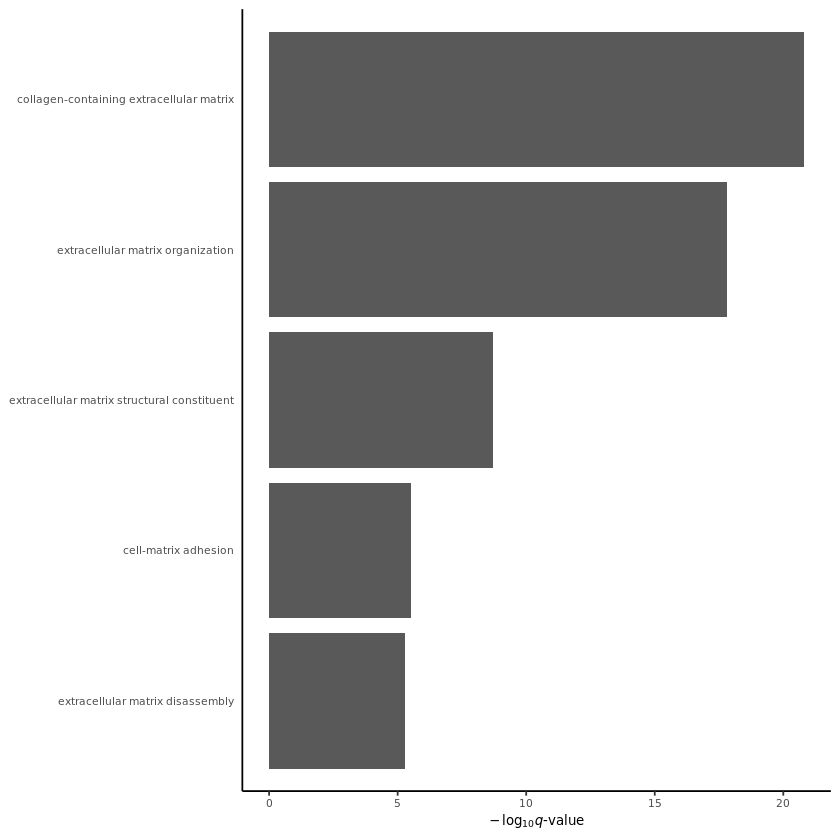

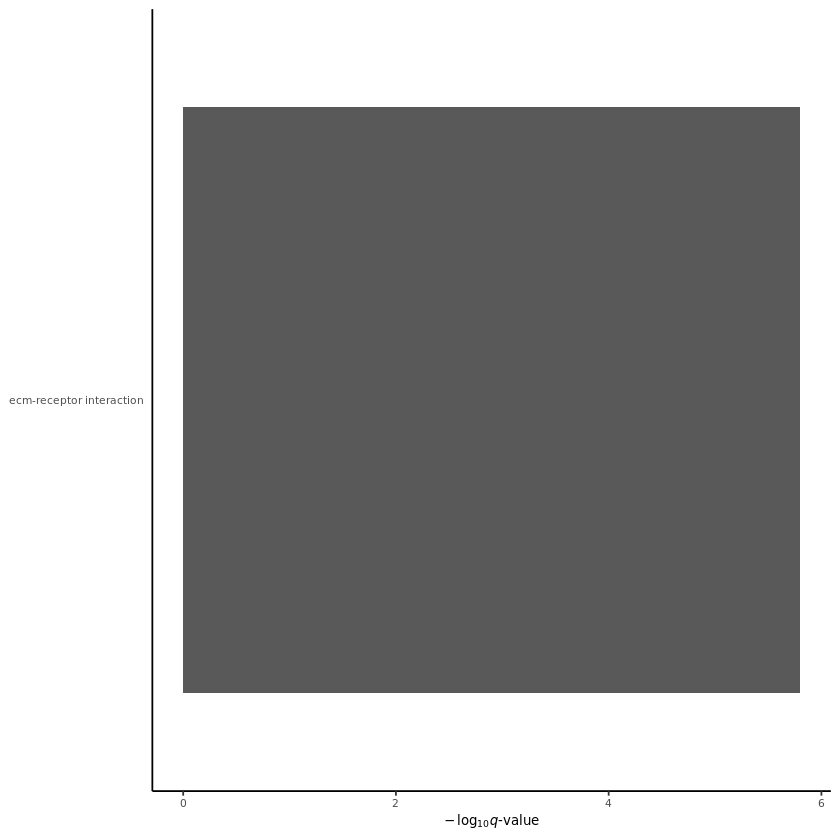

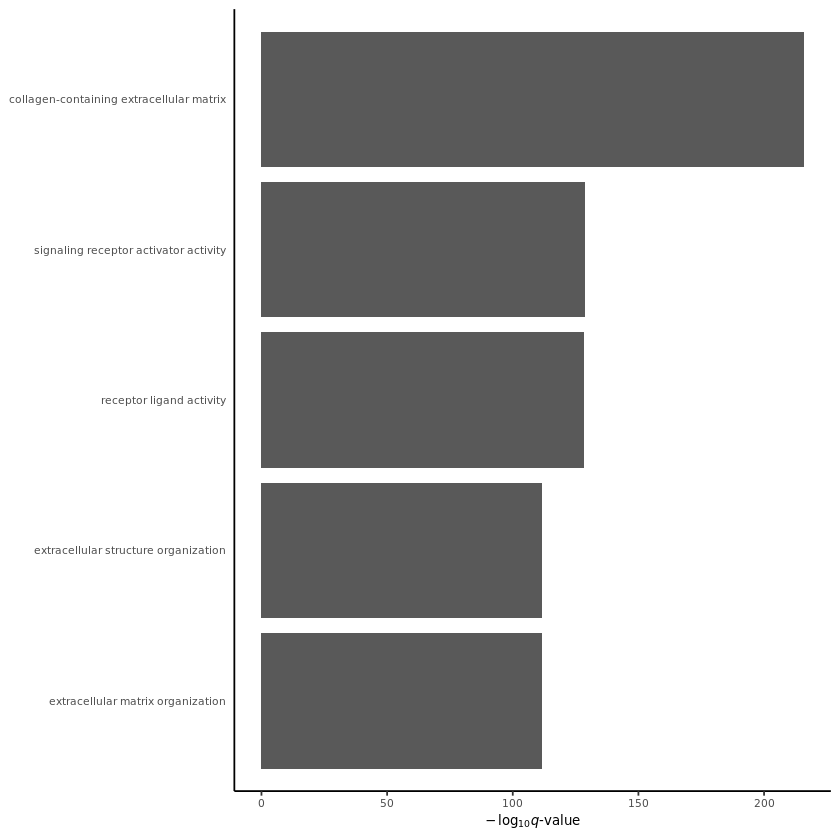

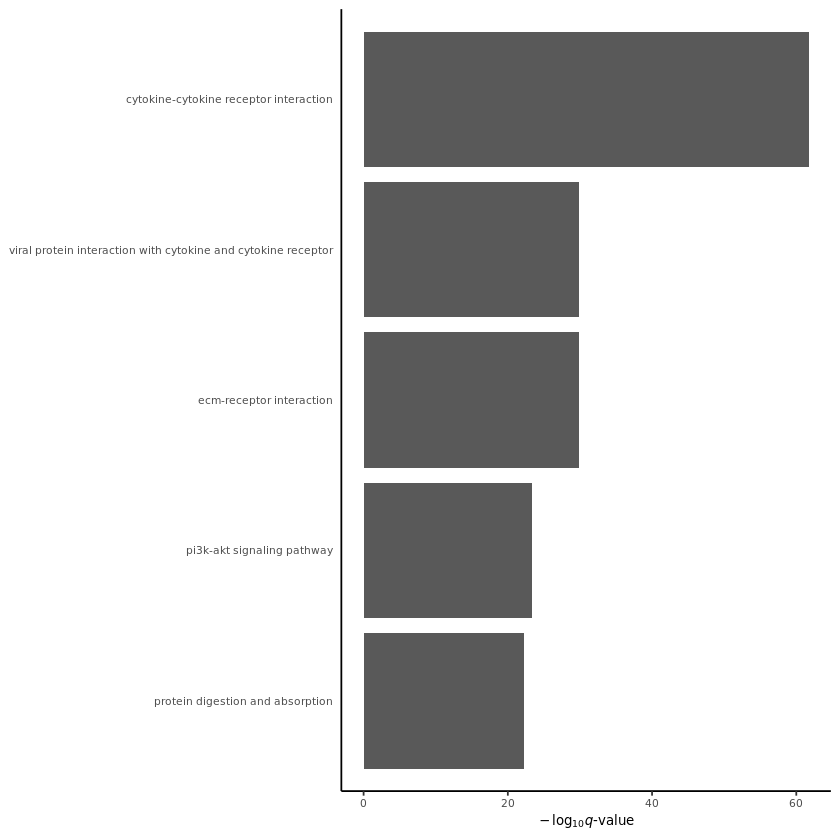

In [8]:
ea_plot(deg_go_df, top = 5, type_filter = "ecm|extracellular matrix|matrix")
deg_goplot <- last_plot()
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_go.png"), deg_goplot, height = ht, width = wd, dpi = dpi)

ea_plot(deg_kegg_df, top = 5, type_filter = "ecm|extracellular matrix|matrix")
deg_keggplot <- last_plot()
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_kegg.png"), deg_keggplot, height = ht, width = wd, dpi = dpi)

ea_plot(demg_go_df, top = 5)
demg_goplot <- last_plot()
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_go.png"), demg_goplot, height = ht, width = wd, dpi = dpi)

ea_plot(demg_kegg_df, top = 5)
demg_keggplot <- last_plot()
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_kegg.png"), demg_keggplot, height = ht, width = wd, dpi = dpi)

# FIGO enrichment

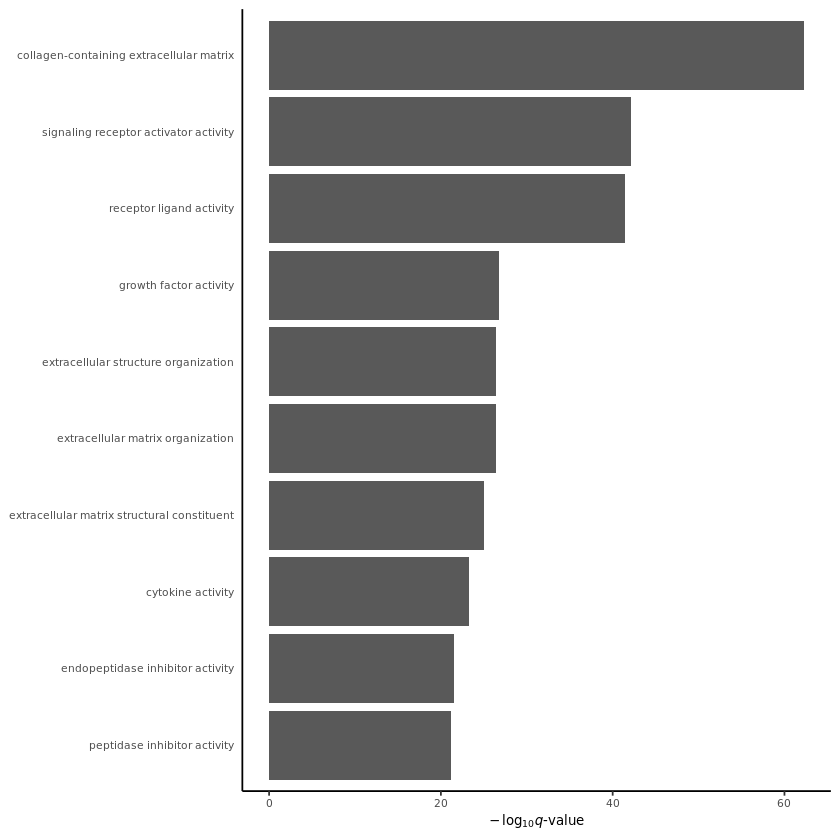

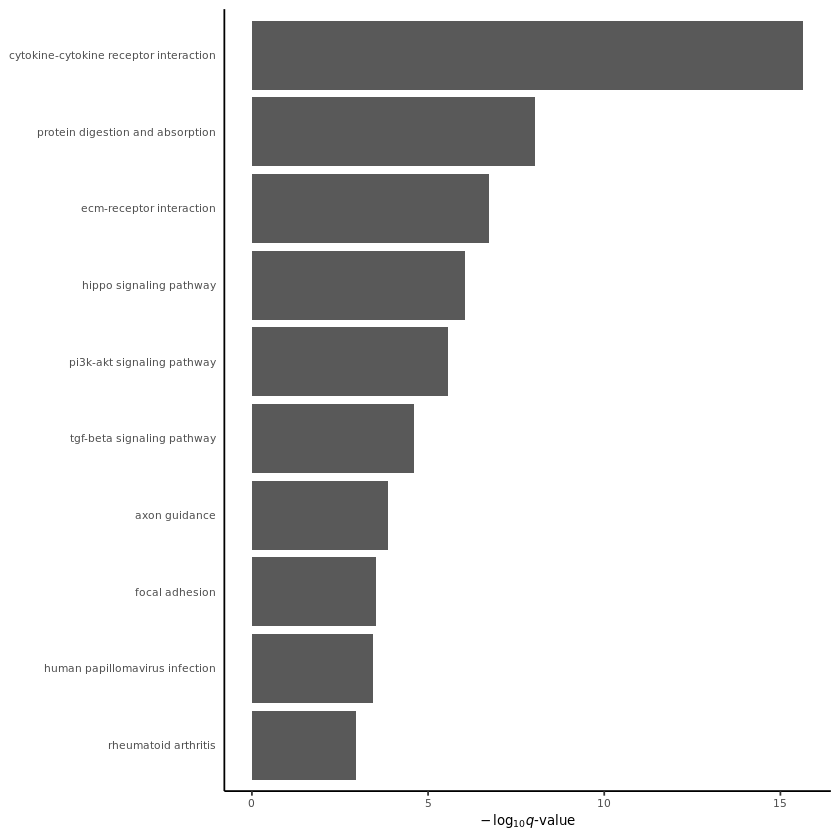

In [9]:
ea_plot(figo_go_df, top = top_n)
figo_goplot <- last_plot()
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_go.png"), figo_goplot, height = ht, width = wd, dpi = dpi)

ea_plot(figo_kegg_df, top = top_n)
figo_keggplot <- last_plot()
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_kegg.png"), figo_keggplot, height = ht, width = wd, dpi = dpi)

# Survival enrichment

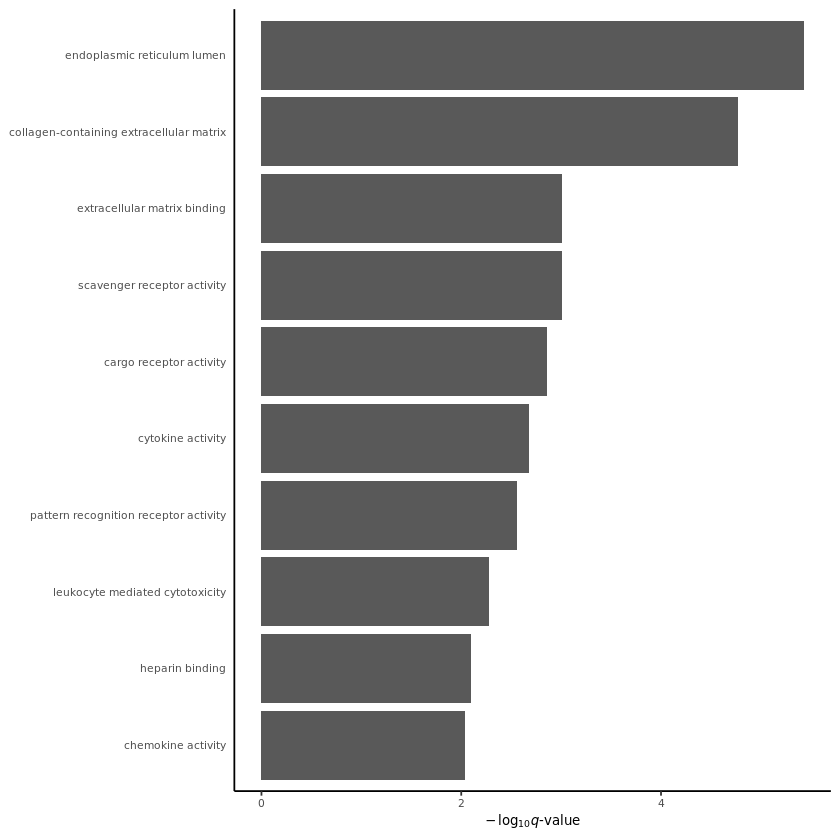

In [10]:
ea_plot(survival_go_df, top = top_n)
survival_goplot <- last_plot()
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_go.png"), survival_goplot, height = ht, width = wd, dpi = dpi)

if (dset_idx != 3) {
    ea_plot(survival_kegg_df, top = top_n)
    survival_keggplot <- last_plot()
    ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_kegg.png"), survival_keggplot, height = ht, width = wd, dpi = dpi)
}

# Save out plot objects

In [11]:
assign(paste0(projects[dset_idx], "_deg_goplot"), deg_goplot)
assign(paste0(projects[dset_idx], "_deg_keggplot"), deg_keggplot)
assign(paste0(projects[dset_idx], "_demg_goplot"), demg_goplot)
assign(paste0(projects[dset_idx], "_demg_keggplot"), demg_keggplot)

assign(paste0(projects[dset_idx], "_figo_goplot"), figo_goplot)
assign(paste0(projects[dset_idx], "_figo_keggplot"), figo_keggplot)
assign(paste0(projects[dset_idx], "_survival_goplot"), survival_goplot)



surv_ls <- c(
    paste0(projects[dset_idx], "_deg_goplot"),
    paste0(projects[dset_idx], "_deg_keggplot"),
    paste0(projects[dset_idx], "_demg_goplot"),
    paste0(projects[dset_idx], "_demg_keggplot"),
    paste0(projects[dset_idx], "_figo_goplot"),
    paste0(projects[dset_idx], "_figo_keggplot"),
    paste0(projects[dset_idx], "_survival_goplot")
)

if (dset_idx != 3) {
    assign(paste0(projects[dset_idx], "_survival_keggplot"), survival_keggplot)
    surv_ls <- c(surv_ls, paste0(projects[dset_idx], "_survival_keggplot"))
}

save(
    list = surv_ls,
    file = paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[dset_idx], "_enrichment_plots.RData")
)